In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [3]:
# Loading the Breast Cancer Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [7]:
 # Display dataset information
print(f"Dataset shape: {X.shape}")
print(f"Target classes: {y.unique()}")

Dataset shape: (569, 30)
Target classes: [0 1]


In [9]:
# Checking for Missing Values
print("Missing values in features:", X.isnull().sum().sum())
print("Missing values in target:", y.isnull().sum())

Missing values in features: 0
Missing values in target: 0


In [11]:
# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store model results
results = {}


In [15]:
# Function to evaluate a model
def evaluate_model(model, name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else y_pred)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    results[name] = {"Accuracy": acc, "ROC-AUC": roc_auc}
    return model


In [17]:
# Logistic Regression
log_reg = LogisticRegression()
evaluate_model(log_reg, "Logistic Regression")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



LogisticRegression()

In [19]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_clf, "Decision Tree")


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



DecisionTreeClassifier(random_state=42)

In [21]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
evaluate_model(rf_clf, "Random Forest")



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



RandomForestClassifier(random_state=42)

In [23]:
# Support Vector Machine
svm_clf = SVC(probability=True, random_state=42)
evaluate_model(svm_clf, "SVM")



SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



SVC(probability=True, random_state=42)

In [25]:
# k-Nearest Neighbors
knn_clf = KNeighborsClassifier()
evaluate_model(knn_clf, "k-NN")


k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



KNeighborsClassifier()

In [27]:
# Comparing Model Performances
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                     Accuracy   ROC-AUC
Logistic Regression  0.982456  0.995370
Decision Tree        0.912281  0.915675
Random Forest        0.956140  0.993882
SVM                  0.982456  0.995040
k-NN                 0.956140  0.978836


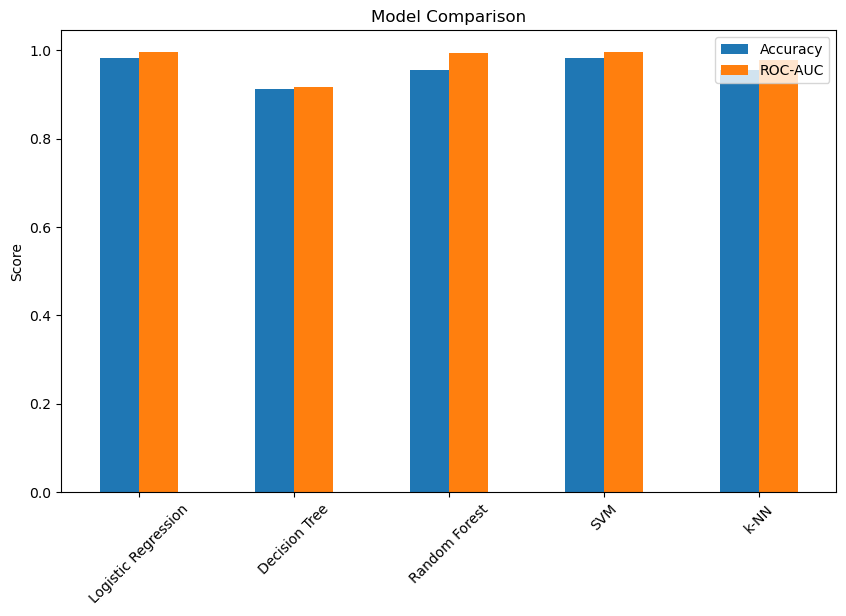

In [29]:
# Plotting the Results
import matplotlib.pyplot as plt

results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.show()


In [31]:
# Conclusion
best_model = results_df["Accuracy"].idxmax()
print(f"The best model is {best_model} with an accuracy of {results_df.loc[best_model, 'Accuracy']:.2f}.")

The best model is Logistic Regression with an accuracy of 0.98.
